In [54]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
df = pd.read_csv('TBS-ecotriplet\\2025_05_08.txt', delimiter='\t')

In [56]:
df

,date,time,Unnamed: 2,turb,Unnamed: 4,chl,Unnamed: 6,cDOM,Unnamed: 8,Unnamed: 9
0,04/08/25,10:15:33,700.0,295.0,695.0,102.0,460.0,271.0,536.0,NaN
1,04/08/25,10:15:34,700.0,243.0,695.0,104.0,460.0,301.0,535.0,NaN
2,04/08/25,10:15:35,700.0,227.0,695.0,101.0,460.0,300.0,535.0,NaN
3,04/08/25,10:15:36,700.0,211.0,695.0,84.0,460.0,284.0,535.0,NaN
4,04/08/25,10:15:37,700.0,202.0,695.0,88.0,460.0,267.0,535.0,NaN
...,...,...,...,...,...,...,...,...,...,...
15946,05/08/25,11:41:47,700.0,4130.0,695.0,1586.0,460.0,4130.0,554.0,NaN
15947,05/08/25,11:41:48,700.0,4130.0,695.0,1578.0,460.0,4130.0,554.0,NaN
15948,05/08/25,11:41:49,700.0,4130.0,695.0,1583.0,460.0,4130.0,554.0,NaN
15949,05/08/25,11:41:50,700.0,4130.0,695.0,1588.0,460.0,4130.0,554.0,NaN


In [57]:
#calculate the parameters according to the manual
chl = 0.0122*(df['chl']-51)
turb = (2.966e-06)*(df['turb']-50)
cDOM = 0.0905*(df['cDOM']-47)
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

C:\Users\pauliins\AppData\Local\Temp\ipykernel_20332\2999261797.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


In [58]:
datetime = df['datetime'] 

(0.0, 50.0)

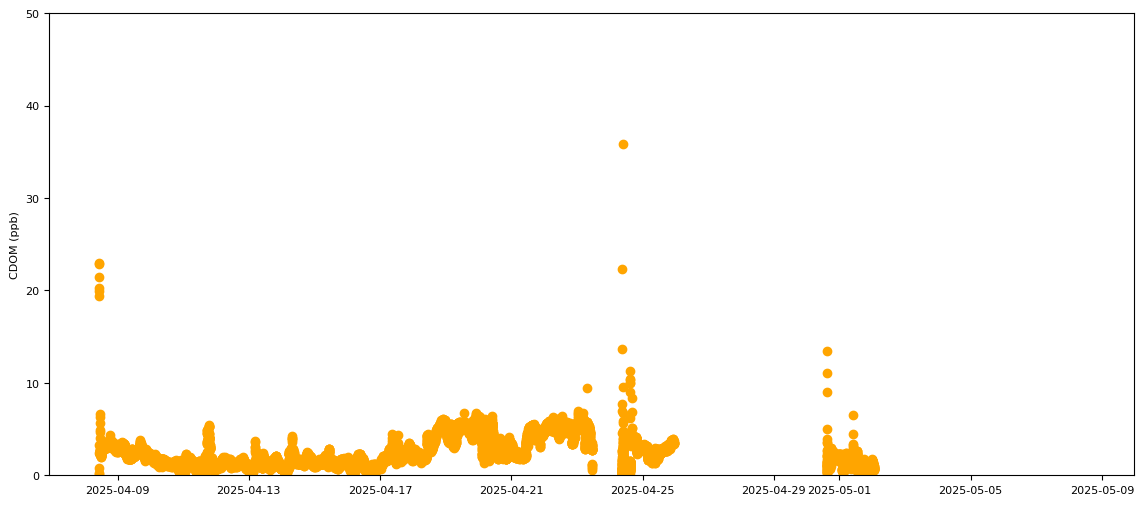

In [59]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=8)
plt.scatter(datetime, cDOM, color='orange')
plt.ylabel('CDOM (ppb)')
plt.ylim(0, 50)


(0.0, 0.015)

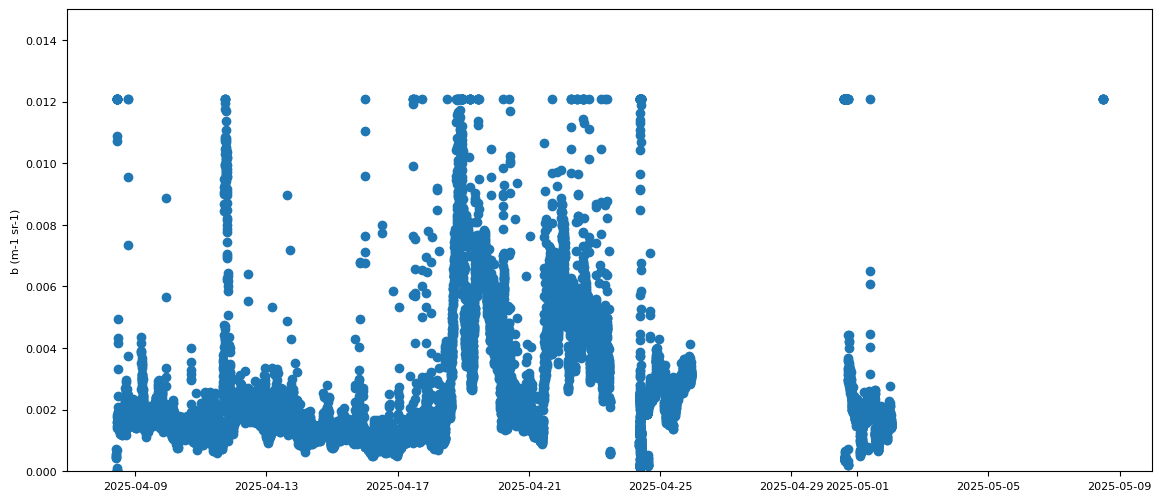

In [60]:
plt.figure(figsize=(14, 6))
plt.scatter(datetime, turb)
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.ylabel('b (m-1 sr-1)')
plt.ylim(0,0.015)

(0.0, 60.0)

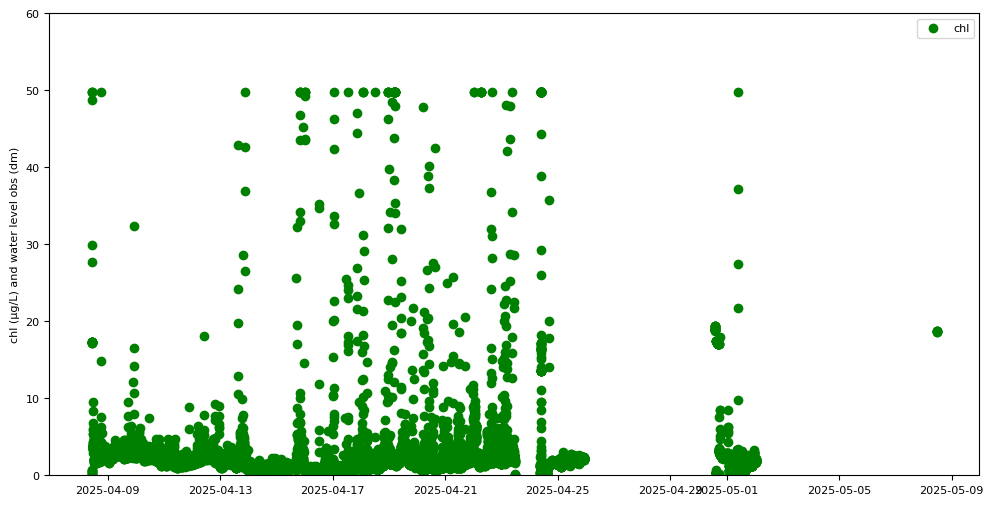

In [61]:
plt.figure(figsize=(12, 6))
plt.scatter(datetime, chl, color = 'green', label='chl')
plt.ylabel('chl (µg/L) and water level obs (dm)')
plt.legend(loc='best')
plt.ylim(0,60)

In [62]:
calibrated_data = pd.DataFrame({'datetime':datetime, 'chl':chl, 'turb': turb, 'cDOM':cDOM})

In [63]:
print(calibrated_data)

                 datetime      chl      turb      cDOM
0     2025-04-08 10:15:33   0.6222  0.000727   20.2720
1     2025-04-08 10:15:34   0.6466  0.000572   22.9870
2     2025-04-08 10:15:35   0.6100  0.000525   22.8965
3     2025-04-08 10:15:36   0.4026  0.000478   21.4485
4     2025-04-08 10:15:37   0.4514  0.000451   19.9100
...                   ...      ...       ...       ...
15946 2025-05-08 11:41:47  18.7270  0.012101  369.5115
15947 2025-05-08 11:41:48  18.6294  0.012101  369.5115
15948 2025-05-08 11:41:49  18.6904  0.012101  369.5115
15949 2025-05-08 11:41:50  18.7514  0.012101  369.5115
15950                 NaT      NaN       NaN       NaN

[15951 rows x 4 columns]


In [64]:
calibrated_data.to_csv('TBS-ecotriplet\\calibrated_data_2025_05_08.txt', sep='\t')

In [65]:
filtered_df = calibrated_data[calibrated_data['chl'] > 10]

In [66]:
filtered_df

,datetime,chl,turb,cDOM
6,2025-04-08 10:25:32,17.2142,0.012101,369.5115
7,2025-04-08 10:25:34,17.2508,0.012101,369.5115
8,2025-04-08 10:25:35,17.2386,0.012101,369.5115
9,2025-04-08 10:25:36,17.2264,0.012101,369.5115
10,2025-04-08 10:25:37,17.2508,0.012101,369.5115
...,...,...,...,...
15945,2025-05-08 11:41:46,18.6416,0.012101,369.5115
15946,2025-05-08 11:41:47,18.7270,0.012101,369.5115
15947,2025-05-08 11:41:48,18.6294,0.012101,369.5115
15948,2025-05-08 11:41:49,18.6904,0.012101,369.5115


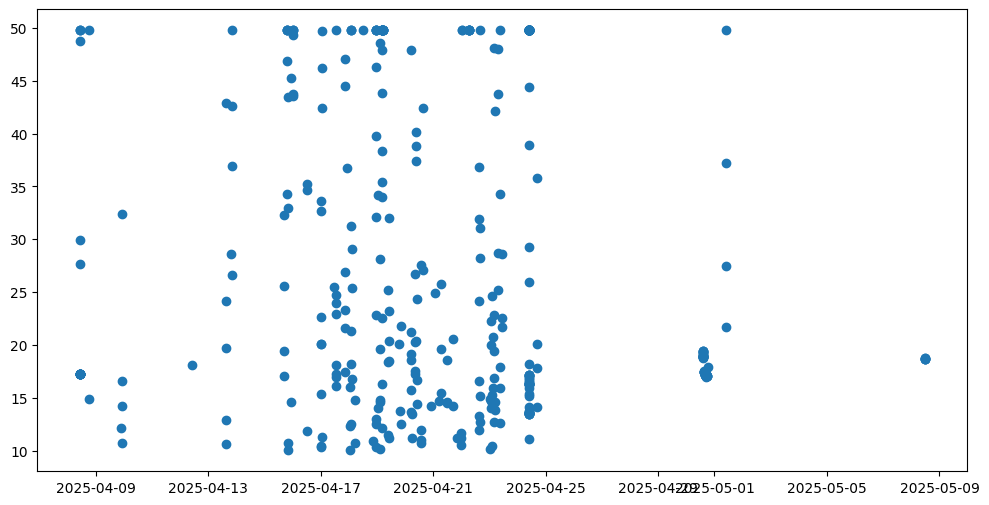

In [35]:
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['datetime'], filtered_df['chl'])